In [29]:
# load 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [30]:
def list_corr(inputs_temps):
    
    pairs = []
    for i in range(inputs_temps.shape[1]):
        for j in range(i+1, inputs_temps.shape[1]):
            coor = inputs_temps[inputs_temps.columns[i]].corr(inputs_temps[inputs_temps.columns[j]])
            pairs.append((inputs_temps.columns[i], inputs_temps.columns[j], coor))
    
    # sort by correlation
    # remove nan values 
    pairs = [pair for pair in pairs if not np.isnan(pair[2])]
    pairs = sorted(pairs, key=lambda x: x[2], reverse=True)
    return pairs


In [31]:
data_path = "processing/AITEX_cleaned_01.csv"

data = pd.read_csv(data_path, sep=";")

In [32]:
data

,Material,Nº holes / Nº filaments,Diameter (mm),L/D,Filter (um),Sand quantity (cm),Support,Vpump (rpm),Vext (rpm),TE1 (°C),...,Tg2(°C),Tg3(°C),Quench (%),Spin. F (rmp),Height (m),Count (dtex),Tenacity (g/den),Elongation (%),Sand size min (um),Sand size max (um)
0,COPET GP001-EASTMAN,36.0,0.4,4.0,60.0,NaN,4.0,10.0,23.9,280.0,...,110.0,110.0,20.0,24.0,1.40,155,0.54,44.94,NaN,NaN
1,COPET GP001-EASTMAN,48.0,0.4,4.0,60.0,2.0,2.0,10.7,30.2,280.0,...,100.0,80.0,30.0,24.0,1.50,170,1.64,64.69,850.0,500.0
2,COPET GP001-EASTMAN,48.0,0.4,4.0,60.0,2.0,2.0,10.7,30.7,280.0,...,100.0,90.0,30.0,24.0,1.50,160,1.67,73.79,850.0,500.0
3,COPET GP001-EASTMAN,48.0,0.4,4.0,60.0,2.0,2.0,10.7,30.7,280.0,...,100.0,90.0,30.0,24.0,1.50,140,1.99,44.83,850.0,500.0
4,PLA 6100D NATUREWORKS,36.0,0.3,2.0,60.0,NaN,NaN,15.0,50.0,225.0,...,NaN,NaN,20.0,20.0,1.30,135,2.08,55.33,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,PLA + CaCO3,72.0,0.3,2.0,90.0,2.0,2.0,19.5,43.0,50.0,...,NaN,NaN,40.0,20.0,1.65,220,1.70,95.00,500.0,355.0
400,PLA + CaCO3,72.0,0.3,2.0,90.0,2.0,2.0,19.5,41.0,50.0,...,NaN,NaN,40.0,20.0,1.65,220,1.70,100.00,500.0,355.0
401,MP1924 + 0.3 TiO2,72.0,0.3,2.0,90.0,2.0,2.0,13.0,70.0,69.3,...,NaN,NaN,NaN,18.0,1.50,133,2.16,128.00,500.0,355.0
402,MP1925 + 0.3 TiO2,72.0,0.3,2.0,90.0,2.0,2.0,14.0,45.0,154.8,...,NaN,NaN,10.0,16.0,1.60,136,2.62,130.67,500.0,355.0


In [33]:
output_cols = [col for col in data.columns if col.startswith("PERF_")]
input_cols = [col for col in data.columns if col not in output_cols]


outputs_list = ["Tenacity (g/den)","Count (dtex)","Elongation (%)"]
inputs_list = set(data.columns) - set(outputs_list)
inputs_list = list(inputs_list)

outputs = data[outputs_list]
inputs = data[inputs_list]



/tmp/ipykernel_4075700/817770179.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  inputs.hist(ax=fig.gca());


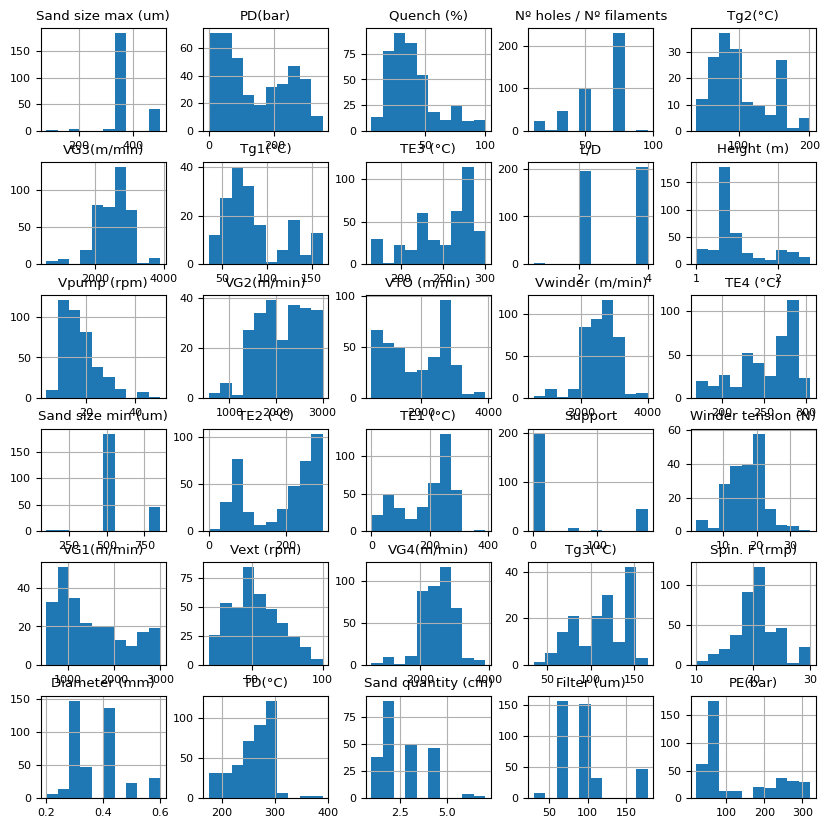

In [34]:
# Veamos un histogramas de los inputs 
fig = plt.figure(figsize=(10, 10))
# default fontsize
plt.rcParams.update({'font.size': 8})
inputs.hist(ax=fig.gca());

In [35]:
inputs

,Sand size max (um),PD(bar),Quench (%),Nº holes / Nº filaments,Tg2(°C),VG3(m/min),Tg1(°C),TE3 (°C),L/D,Material,...,VG1(m/min),Vext (rpm),VG4(m/min),Tg3(°C),Spin. F (rmp),Diameter (mm),TD(°C),Sand quantity (cm),Filter (um),PE(bar)
0,NaN,95.2,20.0,36.0,110.0,1751,85.0,285.0,4.0,COPET GP001-EASTMAN,...,1005.0,23.9,1780,110.0,24.0,0.4,295.0,NaN,60.0,69.1
1,500.0,79.1,30.0,48.0,100.0,1810,85.0,280.0,4.0,COPET GP001-EASTMAN,...,999.0,30.2,1834,80.0,24.0,0.4,285.0,2.0,60.0,75.0
2,500.0,79.1,30.0,48.0,100.0,1961,85.0,280.0,4.0,COPET GP001-EASTMAN,...,999.0,30.7,1991,90.0,24.0,0.4,285.0,2.0,60.0,75.0
3,500.0,79.1,30.0,48.0,100.0,2132,85.0,280.0,4.0,COPET GP001-EASTMAN,...,999.0,30.7,2167,90.0,24.0,0.4,285.0,2.0,60.0,75.0
4,NaN,8.0,20.0,36.0,NaN,2975,NaN,220.0,2.0,PLA 6100D NATUREWORKS,...,2700.0,50.0,2960,NaN,20.0,0.3,235.0,NaN,60.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,355.0,240.0,40.0,72.0,NaN,2550,NaN,225.0,2.0,PLA + CaCO3,...,NaN,43.0,2550,NaN,20.0,0.3,235.0,2.0,90.0,240.0
400,355.0,240.0,40.0,72.0,NaN,2570,NaN,225.0,2.0,PLA + CaCO3,...,NaN,41.0,2570,NaN,20.0,0.3,235.0,2.0,90.0,240.0
401,355.0,295.0,NaN,72.0,NaN,2851,NaN,280.0,2.0,MP1924 + 0.3 TiO2,...,NaN,70.0,2837,NaN,18.0,0.3,290.0,2.0,90.0,295.0
402,355.0,305.0,10.0,72.0,NaN,2842,NaN,295.0,2.0,MP1925 + 0.3 TiO2,...,NaN,45.0,2837,NaN,16.0,0.3,305.0,2.0,90.0,305.0


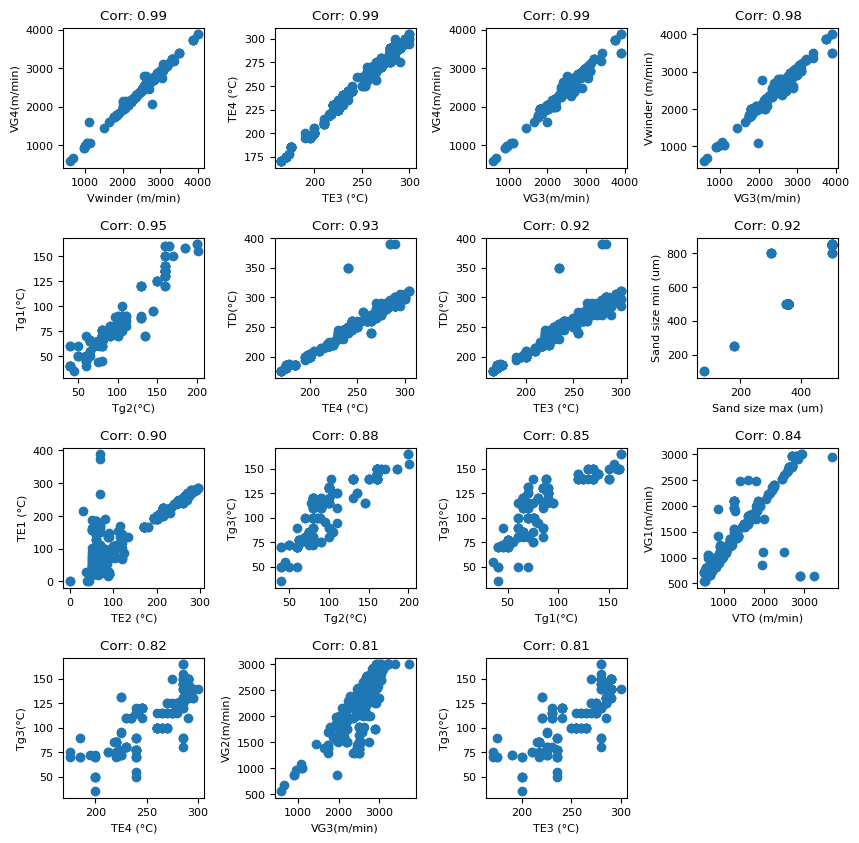

In [36]:
icor = inputs.copy()
icor.pop("Material")
cor = list_corr(icor)

fig = plt.figure(figsize=(10, 10))
# padding between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
nc = 15
nc_sq = int(np.ceil(np.sqrt(nc)))
nc_sq = nc_sq 
for i in range(nc):
    plt.subplot(nc_sq, nc_sq, i+1)
    x = cor[i][0]
    y = cor[i][1]
    plt.plot(inputs[x], inputs[y], 'o')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Corr: {:.2f}".format(cor[i][2]))

In [37]:
inputs.columns

Index(['Sand size max (um)', 'PD(bar)', 'Quench (%)',
       'Nº holes / Nº filaments', 'Tg2(°C)', 'VG3(m/min)', 'Tg1(°C)',
       'TE3 (°C)', 'L/D', 'Material', 'Height (m)', 'Vpump (rpm)',
       'VG2(m/min)', 'VTO (m/min)', 'Vwinder (m/min)', 'TE4 (°C)',
       'Sand size min (um)', 'TE2 (°C)', 'TE1 (°C)', 'Support',
       'Winder tension (N)', 'VG1(m/min)', 'Vext (rpm)', 'VG4(m/min)',
       'Tg3(°C)', 'Spin. F (rmp)', 'Diameter (mm)', 'TD(°C)',
       'Sand quantity (cm)', 'Filter (um)', 'PE(bar)'],
      dtype='object')

In [40]:
materials = data['Material'].unique()

datasets = []
for material in materials:
    sample = data[data['Material'] == material]
    datasets.append(sample)

In [41]:
datasets = [dataset for dataset in datasets if len(dataset) > 5]

In [42]:
def reducedataset(sample):

    columns = sample.columns

    constants = {}
    for col in columns:

        if sample[col].nunique() == 1:
            constants[col] = sample[col].unique()[0]
            sample = sample.drop(col, axis=1)
    # remove the columns that are all nan values
    sample = sample.dropna(axis=1, how='all')
    return sample, constants
        

In [44]:
inputs.pop("Material")
ilist_coor = list_corr(inputs.iloc[:,1:])


/home/djoroya/projects/DIMAT/M03_AITEX_YARN/StrenghtSemicrystal/.conda/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/djoroya/projects/DIMAT/M03_AITEX_YARN/StrenghtSemicrystal/.conda/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/djoroya/projects/DIMAT/M03_AITEX_YARN/StrenghtSemicrystal/.conda/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/djoroya/projects/DIMAT/M03_AITEX_YARN/StrenghtSemicrystal/.conda/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/djoroya/projects/DIMAT/M03_AITEX_YARN/StrenghtSemicrystal/.conda/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: Runti

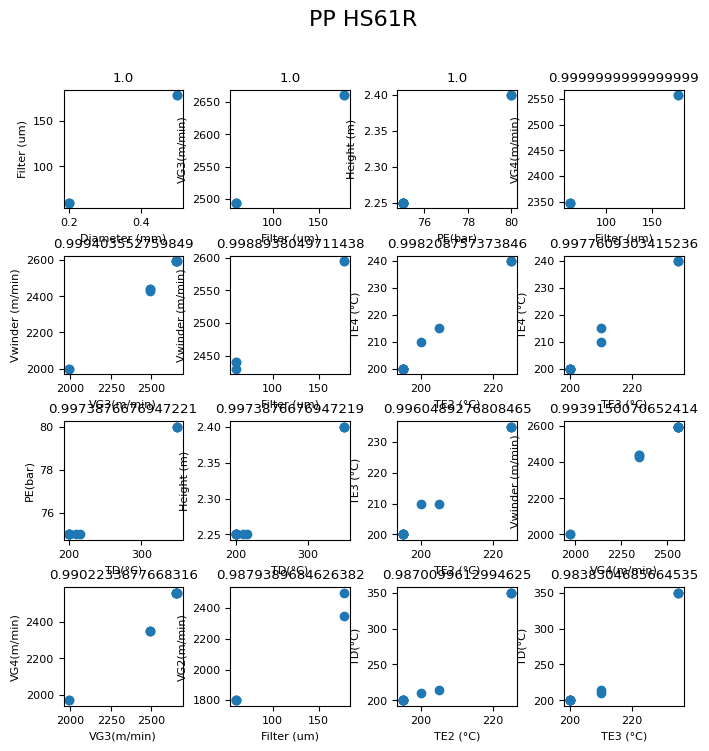

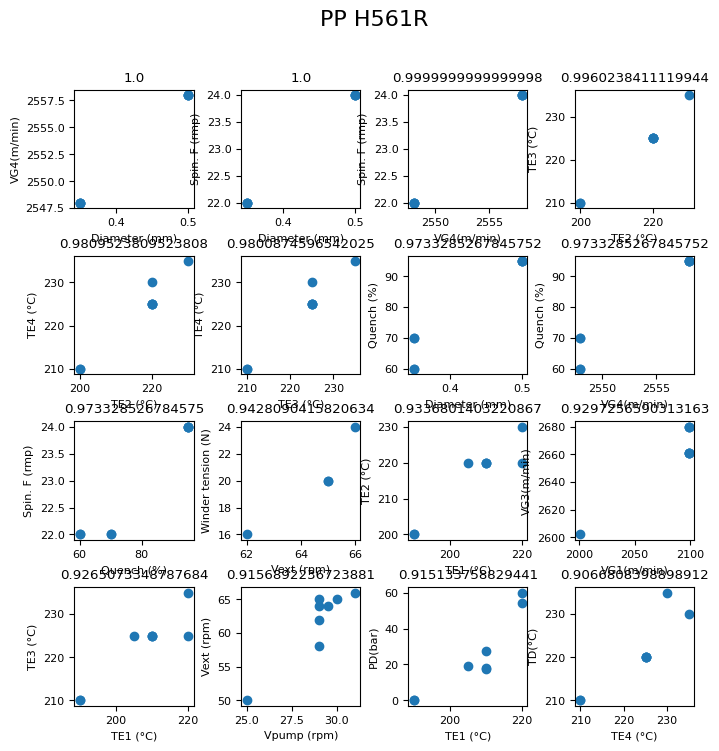

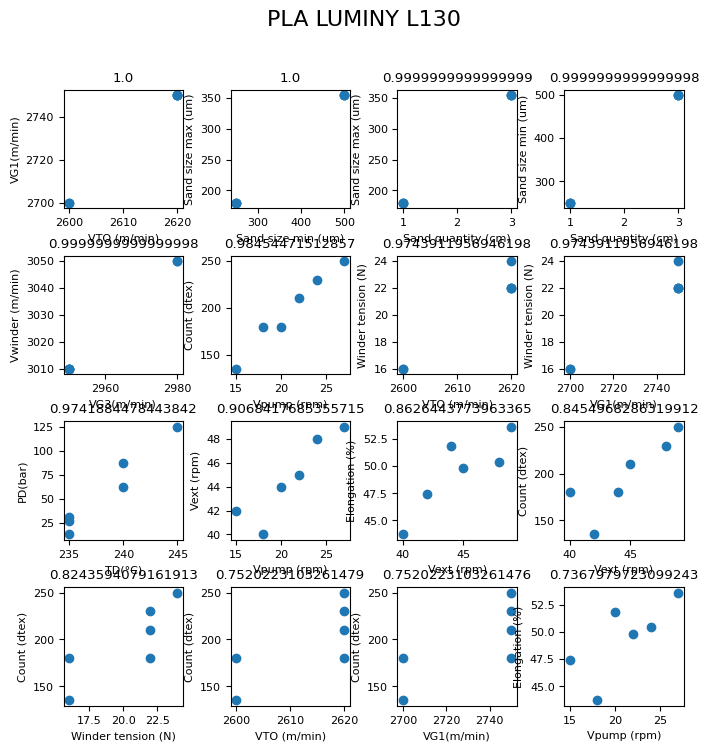

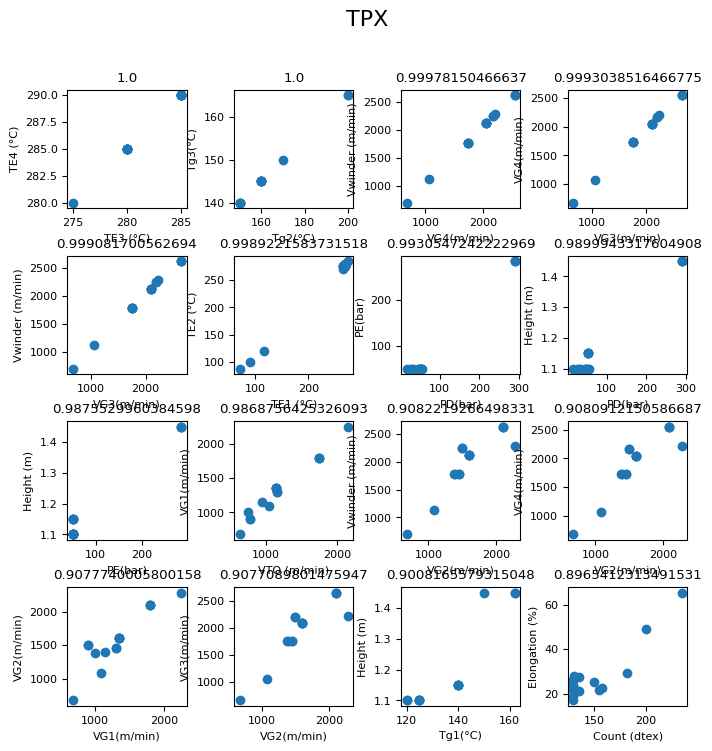

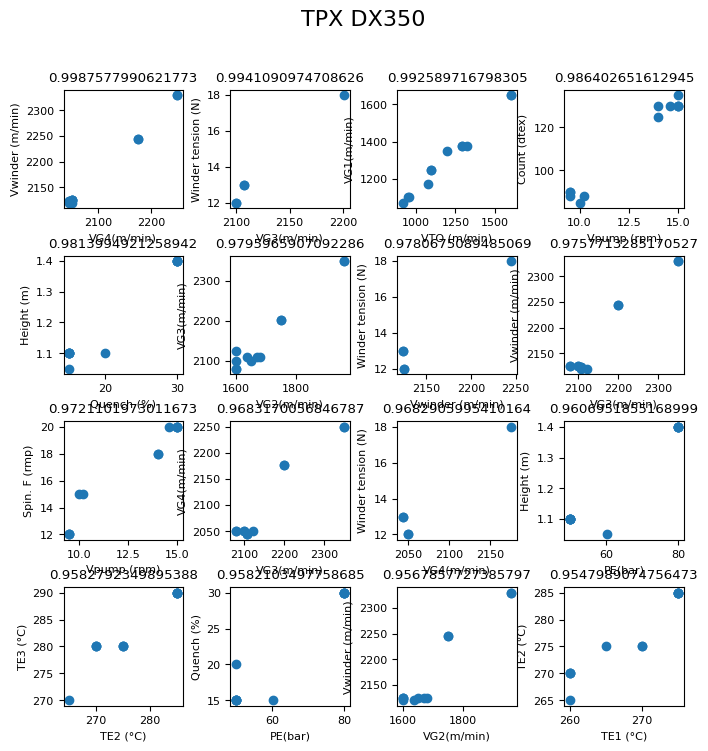

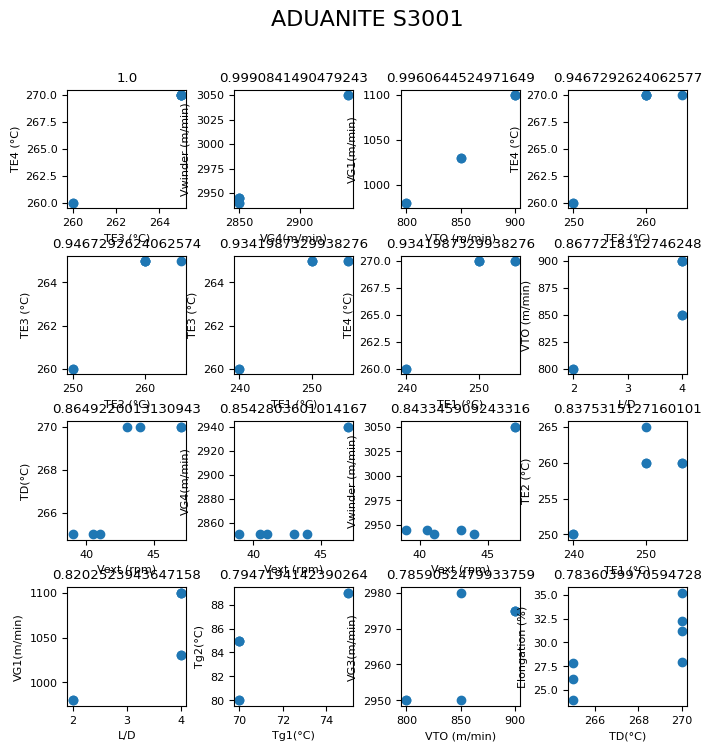

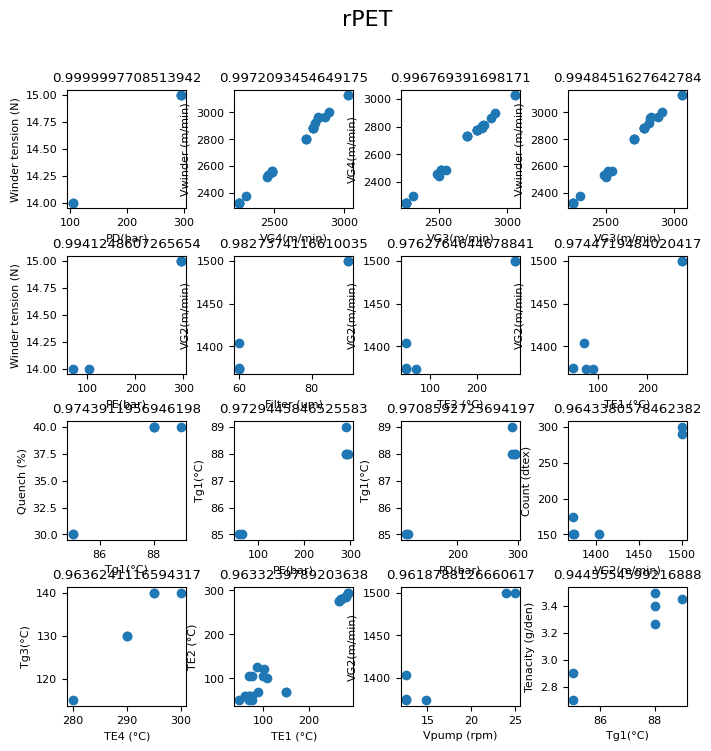

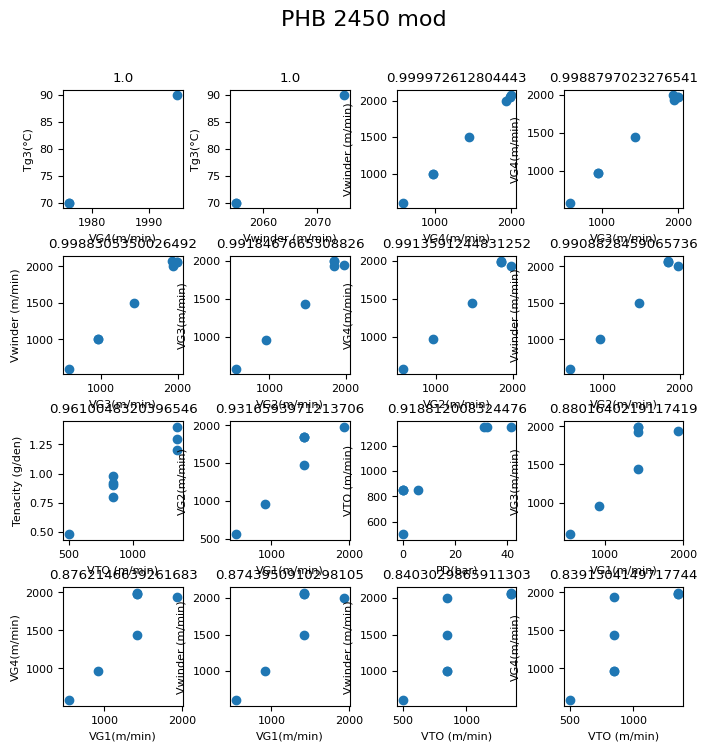

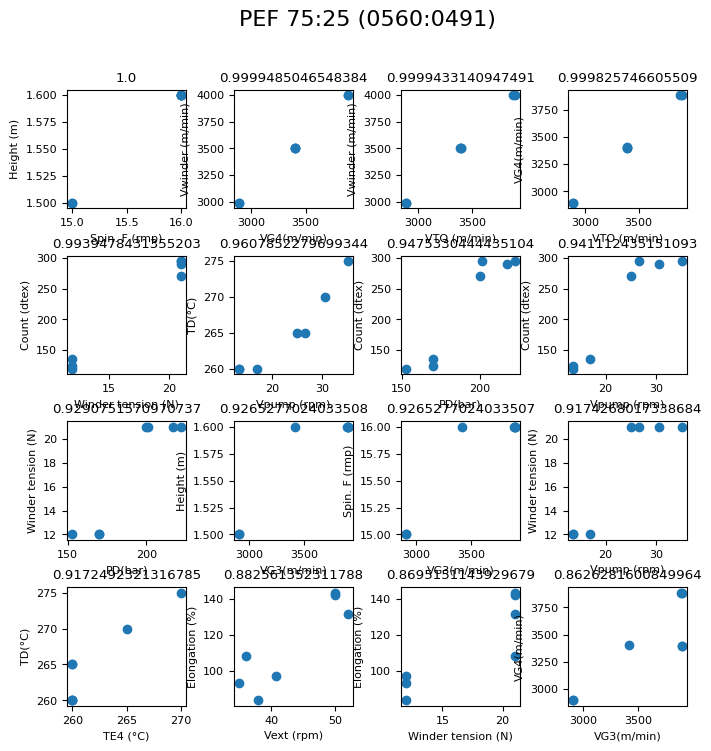

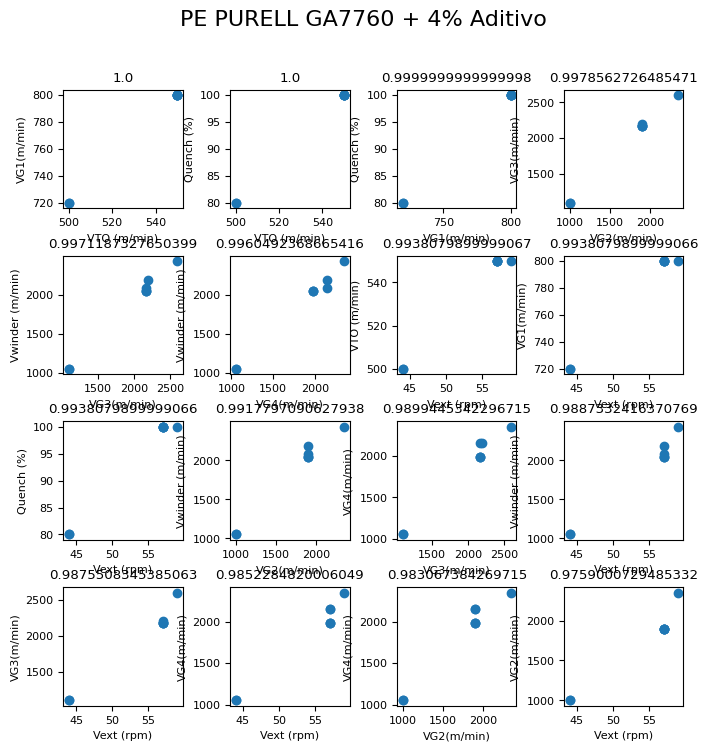

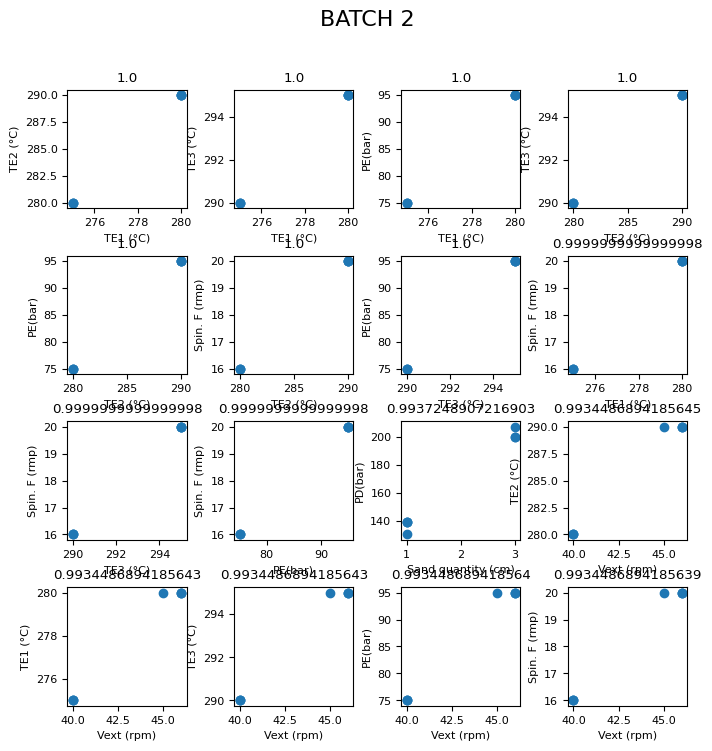

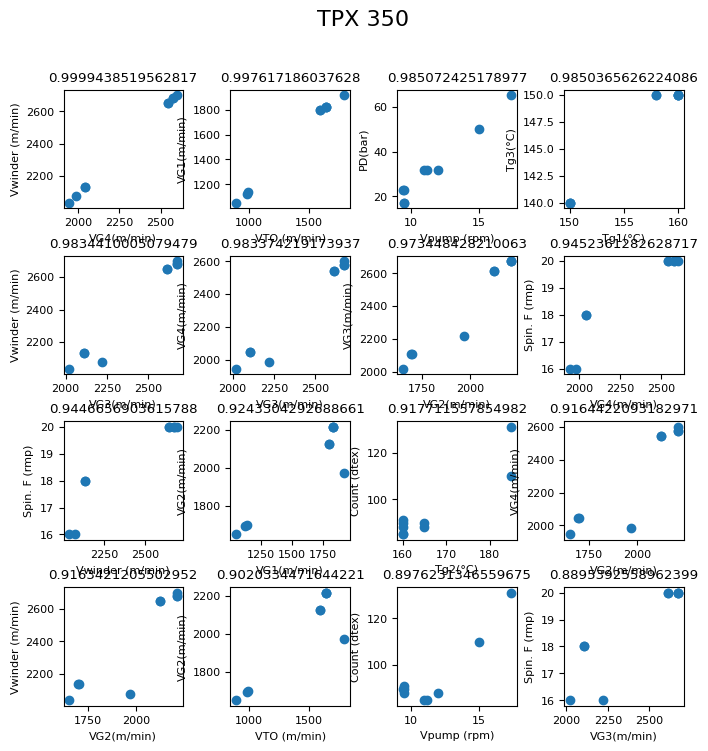

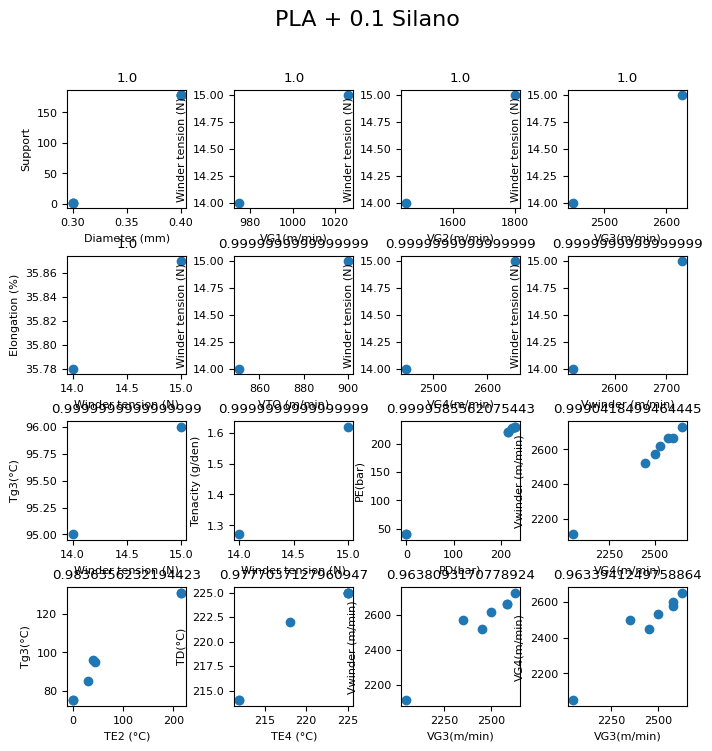

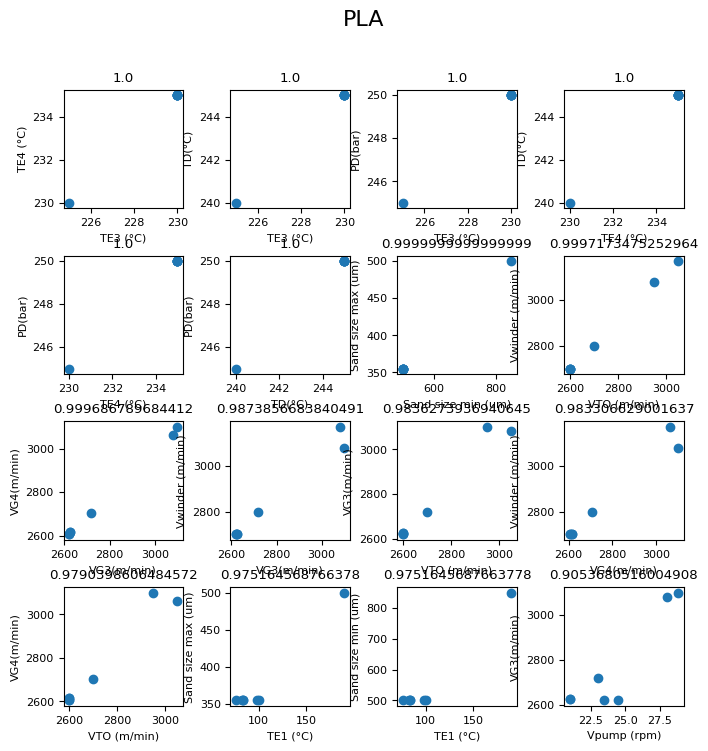

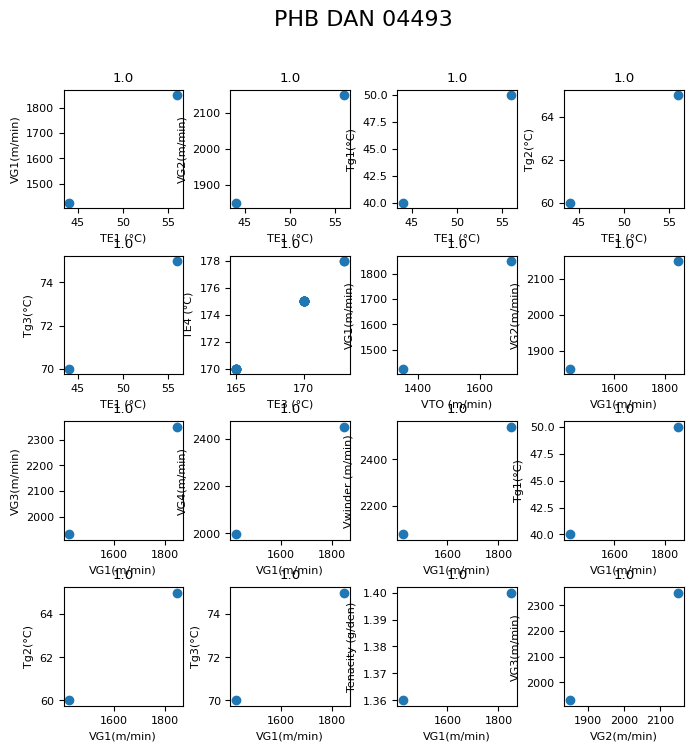

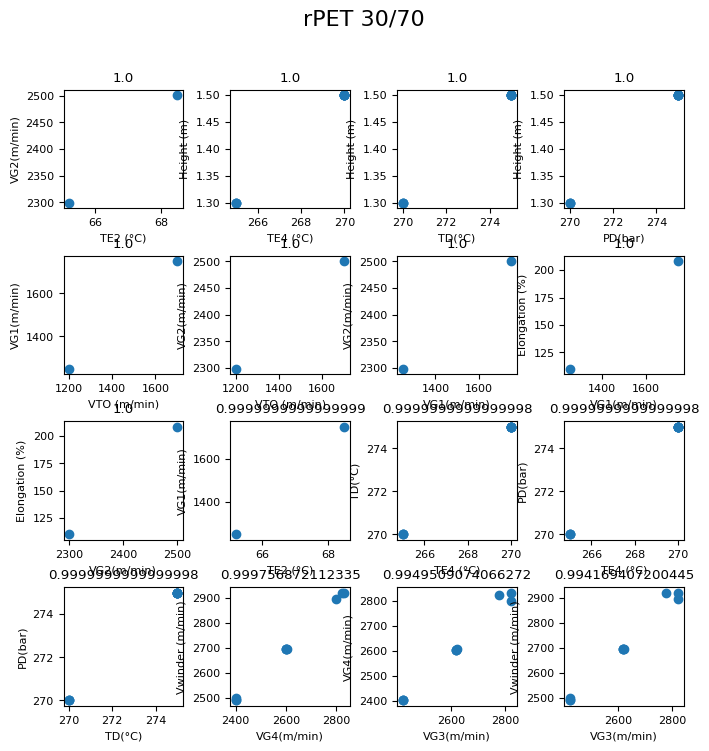

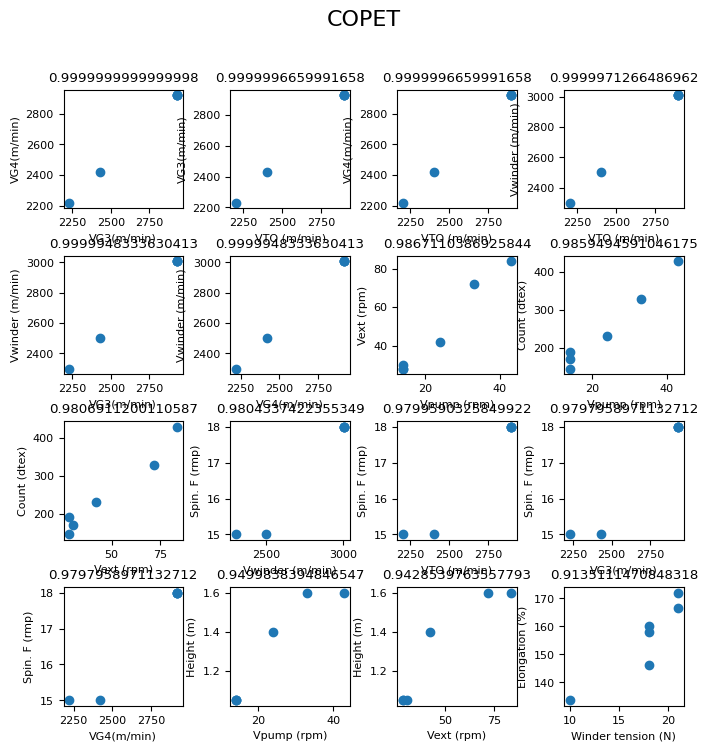

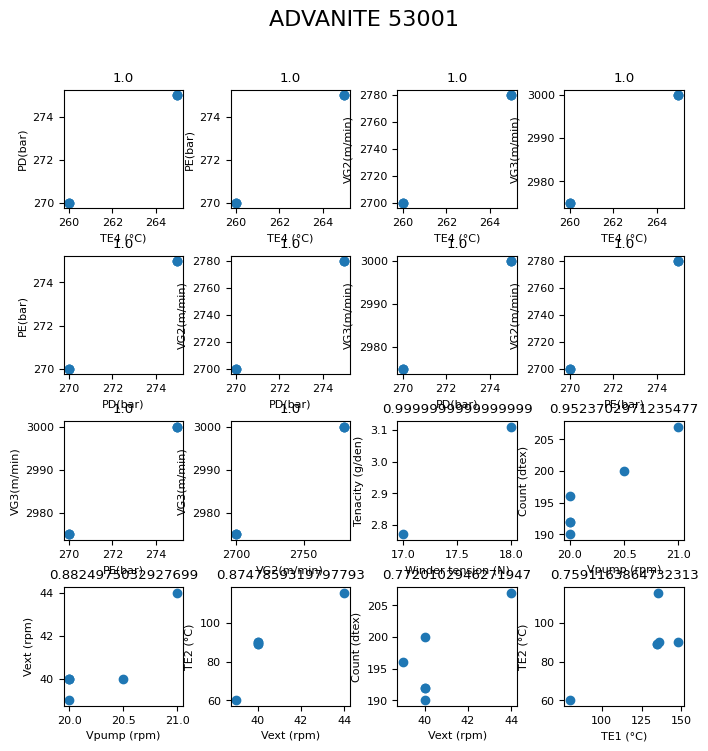

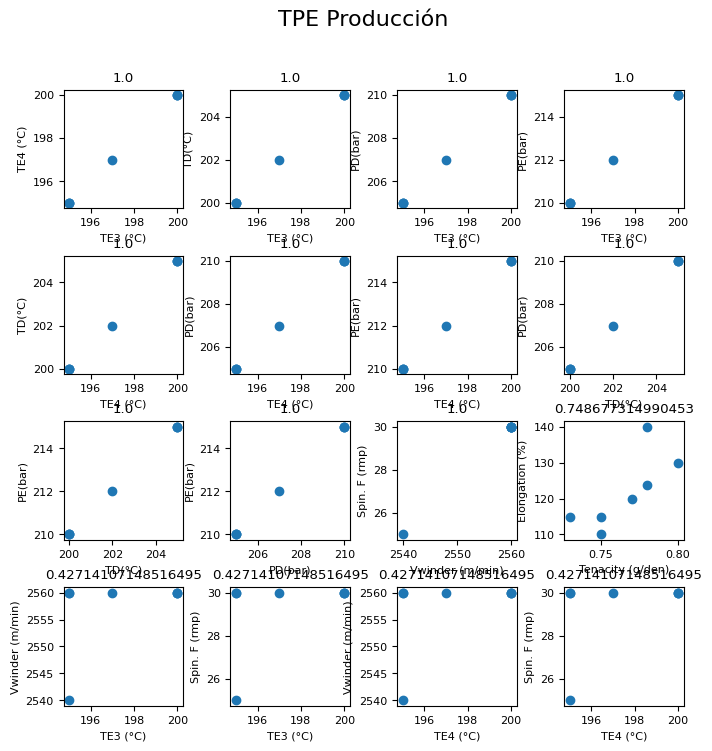

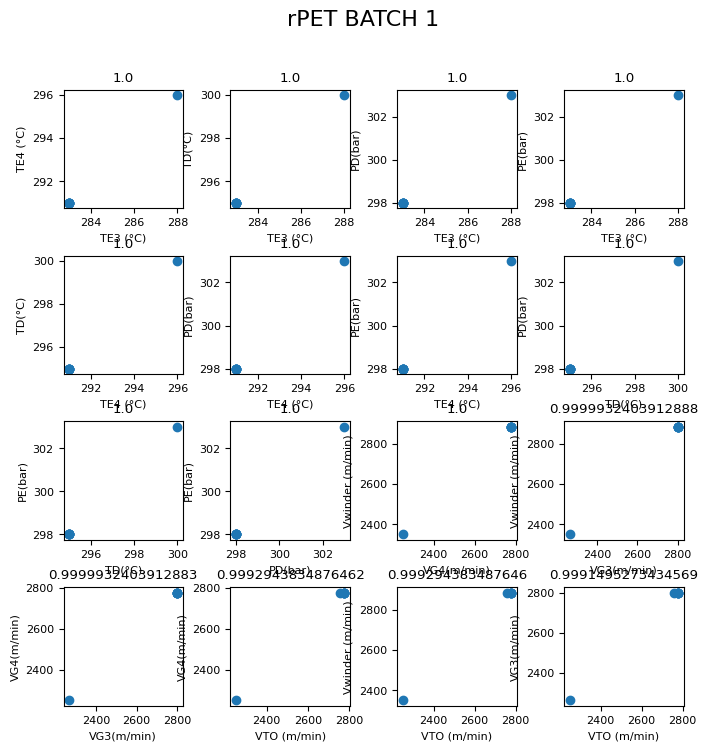

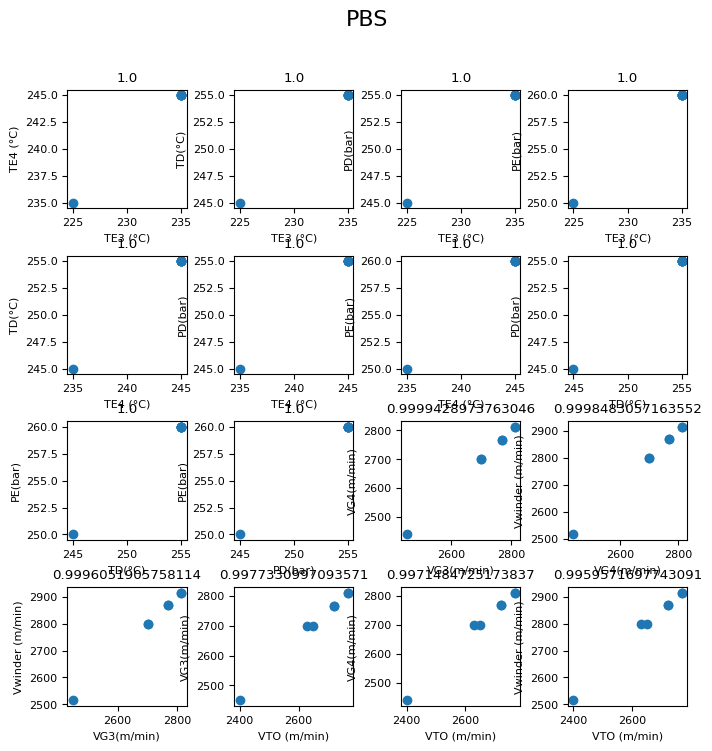

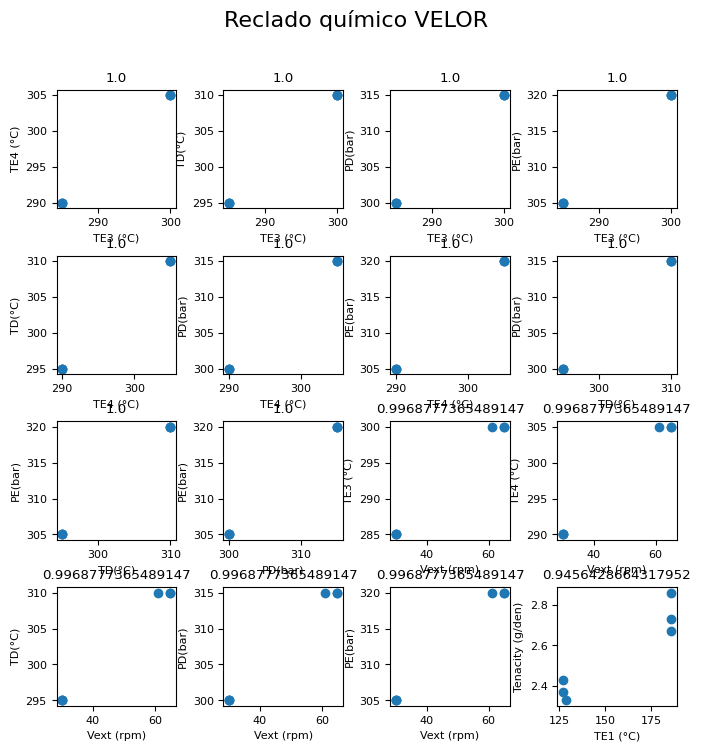

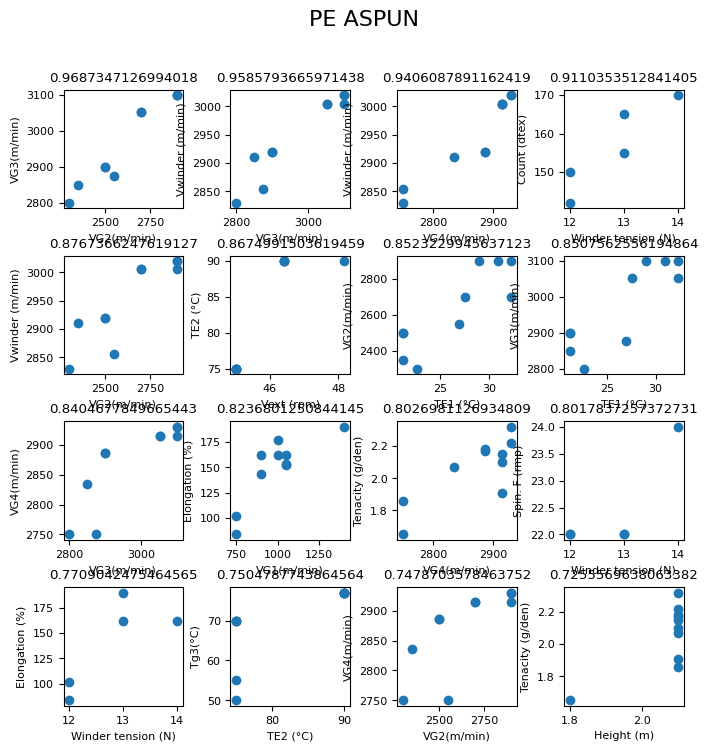

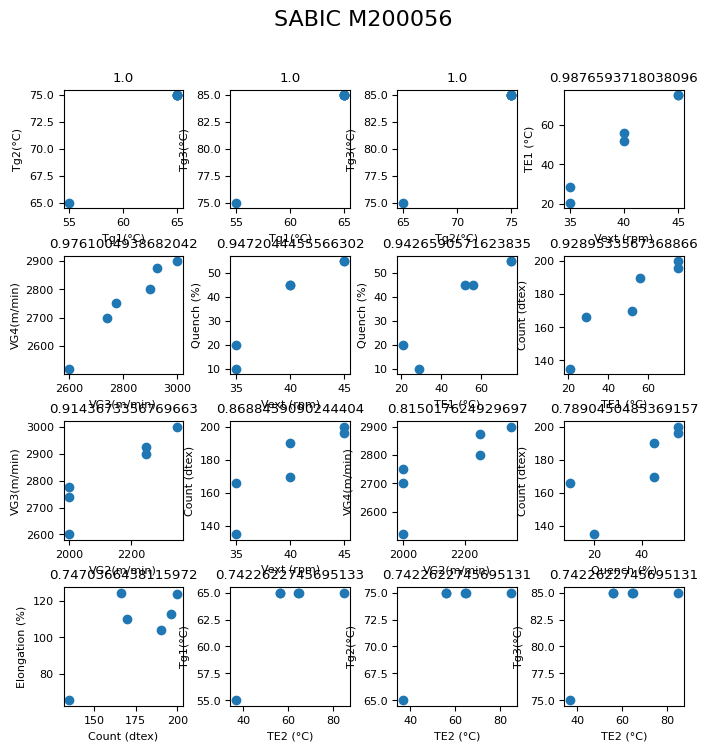

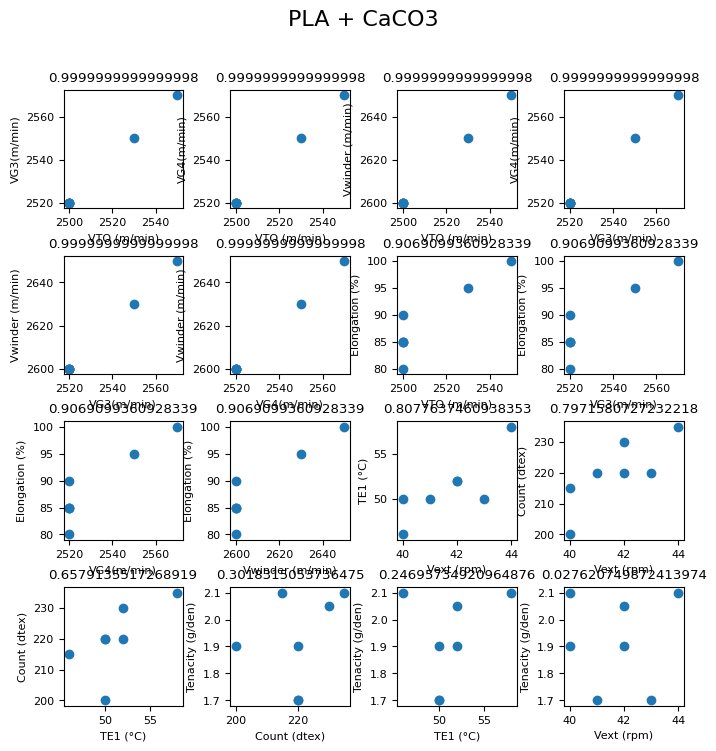

In [47]:
idataset = datasets[0]


best = []

list_list_coor = []
for idataset in datasets:
    idataset, constants = reducedataset(idataset)
    ilist_coor = list_corr(idataset.iloc[:,1:])
    N = 9
    Nq = int(np.sqrt(N) + 1)

    best.append(ilist_coor[:N])
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    # subtitle
    fig.suptitle(constants['Material'], fontsize=16)
    for i in range(Nq):
        for j in range(Nq):
            plt.subplot(Nq, Nq, i*Nq + j + 1)
            plt.scatter(idataset[ilist_coor[i*Nq + j][0]], 
                        idataset[ilist_coor[i*Nq + j][1]])
            plt.title(ilist_coor[i*Nq + j][2])
            plt.xlabel(ilist_coor[i*Nq + j][0])
            plt.ylabel(ilist_coor[i*Nq + j][1])

In [46]:
best[0]

[('Diameter (mm)', 'Filter (um)', np.float64(1.0)),
 ('Filter (um)', 'VG3(m/min)', np.float64(1.0)),
 ('PE(bar)', 'Height (m)', np.float64(1.0)),
 ('Filter (um)', 'VG4(m/min)', np.float64(0.9999999999999999)),
 ('VG3(m/min)', 'Vwinder (m/min)', np.float64(0.999403552759849)),
 ('Filter (um)', 'Vwinder (m/min)', np.float64(0.9988938049711438)),
 ('TE2 (°C)', 'TE4 (°C)', np.float64(0.998208757373846)),
 ('TE3 (°C)', 'TE4 (°C)', np.float64(0.9977609303415236)),
 ('TD(°C)', 'PE(bar)', np.float64(0.9973876676947221))]

In [142]:
best[1]

[('VTO(m/min)', 'VG1(m/min)', np.float64(0.9988051050833651)),
 ('Vpump(rpm)', 'Count(dtex)', np.float64(0.9963862072951535)),
 ('VG1(m/min)', 'VG2(m/min)', np.float64(0.9910760019327667)),
 ('TE2(C)', 'Tenacity(g/den)', np.float64(0.9901443404612486)),
 ('VTO(m/min)', 'VG2(m/min)', np.float64(0.9873597989961757)),
 ('VTO(m/min)', 'Tension', np.float64(0.9743911956946198)),
 ('VG1(m/min)', 'Tension', np.float64(0.9743911956946198)),
 ('VG2(m/min)', 'Elongation (pc)', np.float64(0.9696818462688714)),
 ('VG1(m/min)', 'Elongation (pc)', np.float64(0.9509531548750092))]

In [143]:
best[2]

[('VTO(m/min)', 'VG1(m/min)', np.float64(0.9982096993335097)),
 ('TE1(C)', 'TE2(C)', np.float64(0.9869275424396537)),
 ('Vwinder (m/min)', 'Spin(rpm)', np.float64(0.9565974636906339)),
 ('Vwinder (m/min)', 'Quench(pc)', np.float64(0.9565974636906338)),
 ('Quench(pc)', 'Spin(rpm)', np.float64(0.9561828874675145)),
 ('Vext(rpm)', 'VG2(m/min)', np.float64(0.936100258011524)),
 ('L', 'TE1(C)', np.float64(0.9258200997725515)),
 ('VG2(m/min)', 'Vwinder (m/min)', np.float64(0.9063929525603471)),
 ('L', 'TE2(C)', np.float64(0.8528028654224421))]